In [94]:
import pandas as pd
import emoji as em
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [13]:
ds1 = pd.read_csv("Data.csv")
ds1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
ds1.shape

(13320, 9)

In [15]:
ds1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [16]:
ds2 = ds1.drop(['area_type','society','balcony','availability'],axis='columns')
ds2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
ds2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [18]:
ds3 = ds2.dropna()
ds3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
ds3.shape

(13246, 5)

In [20]:
ds3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
ds3['bhk'] = ds3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ayush\AppData\Local\Temp\ipykernel_15976\1594487530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds3['bhk'] = ds3['size'].apply(lambda x: int(x.split(' ')[0]))


In [22]:
ds3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [23]:
ds3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [24]:
ds3[ds3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [25]:
ds3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [33]:
ds3[~ds3['total_sqft'].apply(is_float)].head(40)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [35]:
def convert_range(x):
    elem = x.split('-')
    if len(elem)==2:
        return (float(elem[0])+float(elem[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [39]:
def convert_sqmt_(x):
    elem = x.split('M')
    p = elem[0].split('S')
    return float(p[0])*10.764

In [41]:
def convert_sqY(x):
    elem = x.split('Y')
    p = elem[0].split('S')
    return float(p[0])*9

In [43]:
def convert_acres(x):
    elem = x.split('A')
    return float(elem[0])*43560

In [46]:
def convert_perch(x):
    elem = x.split('P')
    return float(elem[0])*272.25

In [51]:
ds4 = ds3.copy()
ds4['total_sqft'] = ds4['total_sqft'].apply(convert_range)
ds4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [53]:
ds5 = ds4.copy()
ds5['price_per_sqft'] = ds5['price']*100000/ds5['total_sqft']
ds5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
ds5.location = ds5.location.apply(lambda x: x.strip())
all_location = ds5.groupby('location')['location'].agg('count').sort_values(ascending=False)
all_location

In [59]:
len(all_location[all_location<=10])

1052

In [60]:
less_than_10_locations = all_location[all_location<=10]
less_than_10_locations

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

#  Classifying all locations that have frequency less than 10 as other locations.

In [61]:
len(ds5.location.unique())

1293

In [64]:
ds5.location = ds5.location.apply(lambda x: 'other' if x in less_than_10_locations else x)
len(ds5.location.unique())

242

#### The average sqft area per BHK in india is found out to be 300 on average. So we delete the data that does not follow the criterion.Such anomalies are called Outliers

In [66]:
ds6 = ds5[~(ds5.total_sqft/ds5.bhk<300)]
ds6.shape

(12502, 7)

In [67]:
ds6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#Now if we consider our data as a normal distribution. We can safely assume that around 68% of the dataset will lie between the mean and one standard deviation. Using standard Deviation now ---

In [70]:
def remove_pos_outlier(df):
    dout = pd.DataFrame()
    for key,sdf in df.groupby('location'):
        m = np.mean(sdf.price_per_sqft)
        st = np.std(sdf.price_per_sqft)
        rdf = sdf[(sdf.price_per_sqft>(m-st))&(sdf.price_per_sqft<=(m+st))]
        dout = pd.concat([dout,rdf],ignore_index = True)
    return dout

ds7 = remove_pos_outlier(ds6)
ds7.shape

(10241, 7)

#We should also remove the outliers for which the properties of same location,the price of (for example) a 3BHK apartment is lesser than that of a 2BHK apartment(with almost same sq ft. area). For this we will create a dictionary of statistics per bhk at a location.

##We can then remove those 2 BHK apartments whose price per sq_ft is less than that of mean price per_sqft of a 1 BHK apartment and so on.

Now plotting the graph for such anomalies taking the location of 'Rajaji Nagar' and 'Hebbal' as an Example 

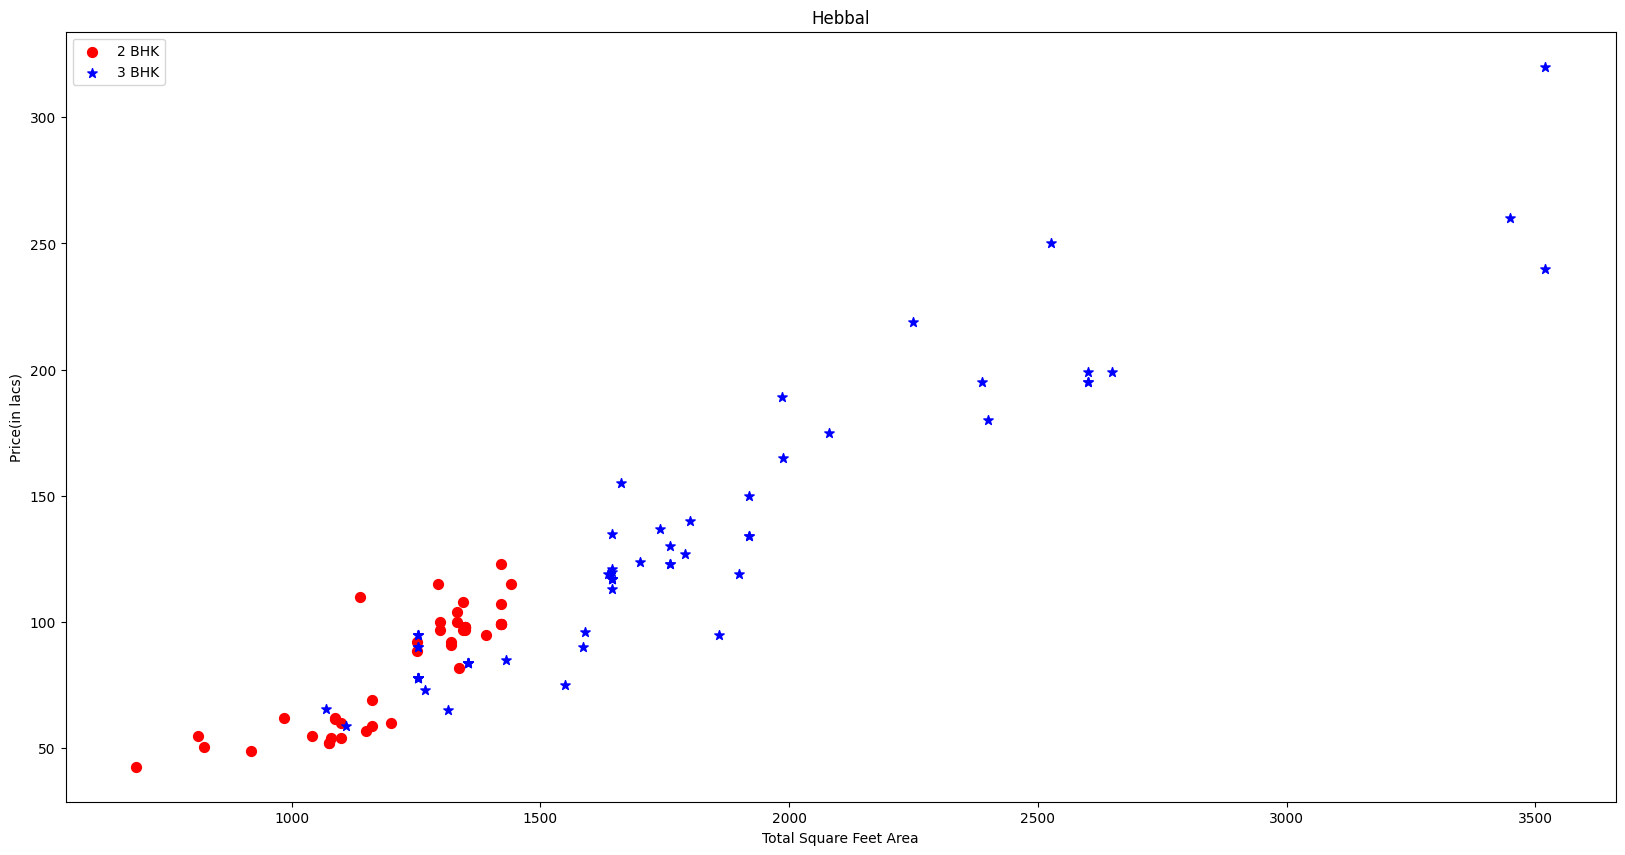

In [85]:
def plot_scatter_chart(ds,location):
    bhk2 = ds[(ds.location==location) & (ds.bhk==2)]
    bhk3 = ds[(ds.location==location) & (ds.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color= 'red',label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price, marker = '*', color = 'blue',label = '3 BHK',s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price(in lacs)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(ds7,'Hebbal')
# plot_scatter_chart(ds7,'Rajaji Nagar')
    
    

In [80]:
def remove_bhk_outlier(ds):
    removed_index = np.array([])
    for location,location_ds in ds.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_ds in location_ds.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_ds.price_per_sqft),
                'std' : np.std(bhk_ds.price_per_sqft),
                'count' : bhk_ds.shape[0]
            }
        for bhk,bhk_ds in location_ds.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                removed_index = np.append(removed_index,bhk_ds[bhk_ds.price_per_sqft<(stats['mean'])].index.values)
    return ds.drop(removed_index,axis = 'index')
    


In [81]:
ds8 = remove_bhk_outlier(ds7)
ds8.shape

(7329, 7)

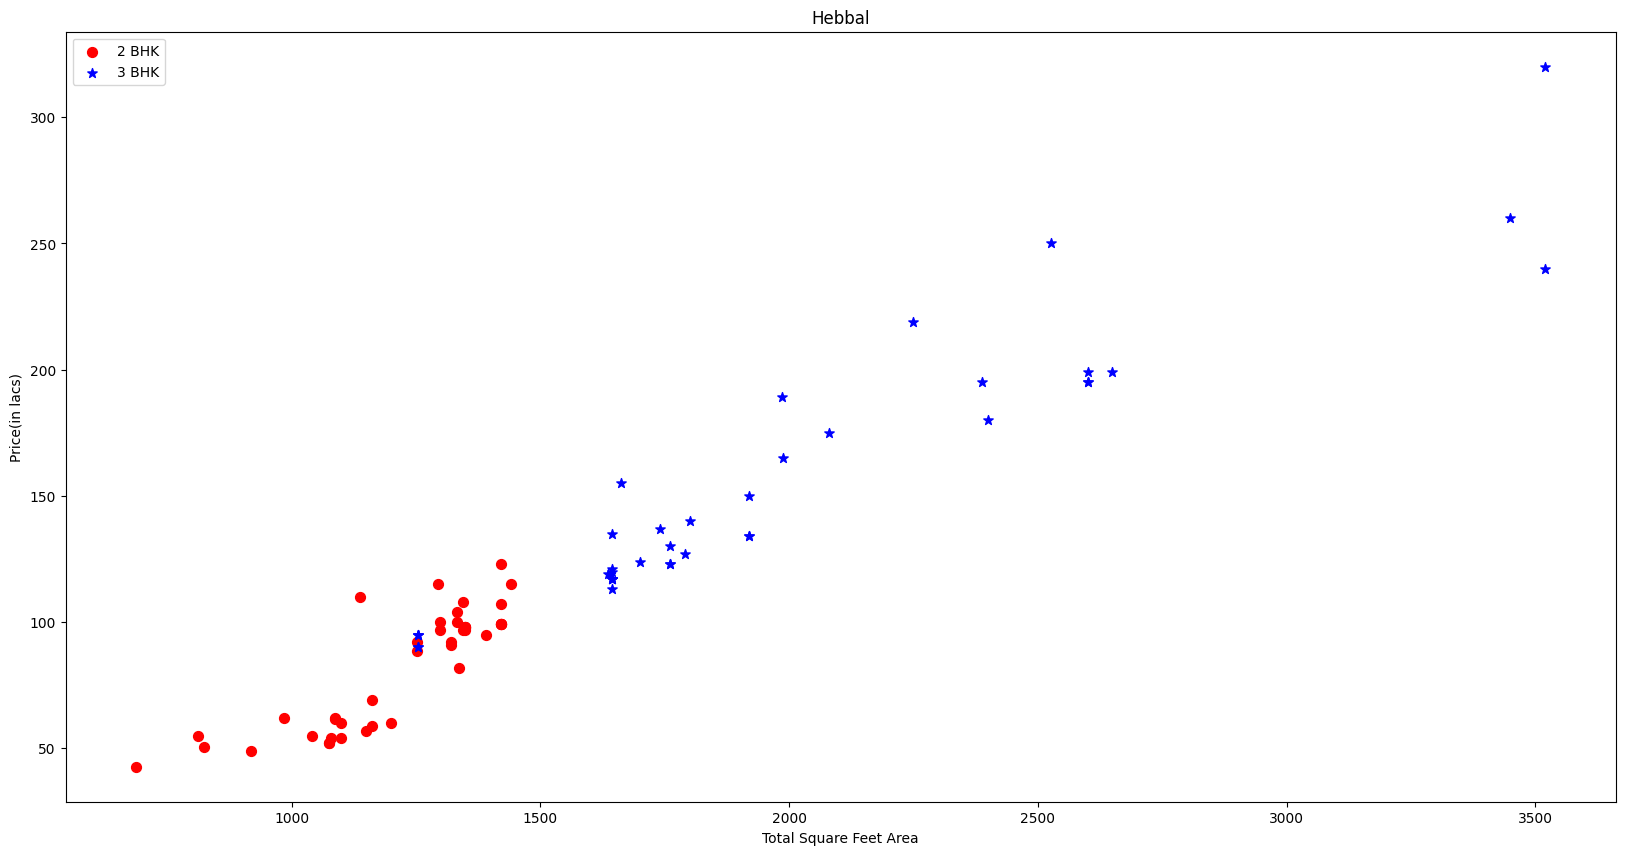

In [86]:
plot_scatter_chart(ds8,'Hebbal')

Now plotting the same plots for the same locations,we can see that the anomalies are now gone.

we then plot a histogram to observe the optimal range in which our dataset lies.

Text(0, 0.5, 'No of Properties')

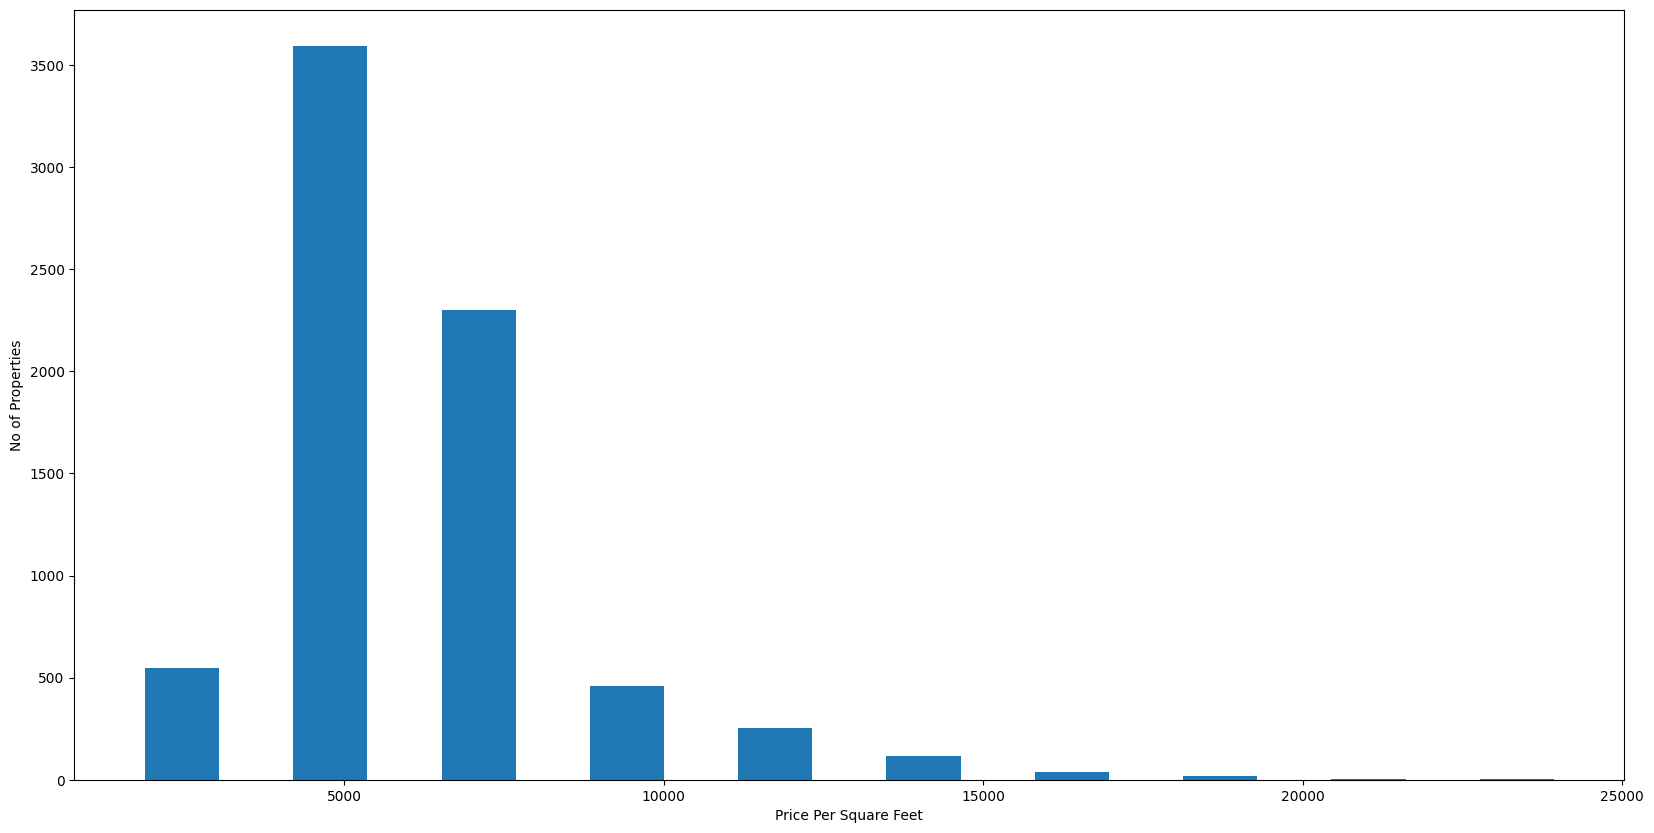

In [89]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(ds8.price_per_sqft,rwidth = 0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('No of Properties')

Now we dive deep into the Number of bathrooms and how it affects the price of the property.

In [91]:
ds8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

to find out the average number of bathrooms,we can plot a histogram of bathrooms vs No of properties to find the median number of bathrooms per property.

Text(0, 0.5, 'No of Properties')

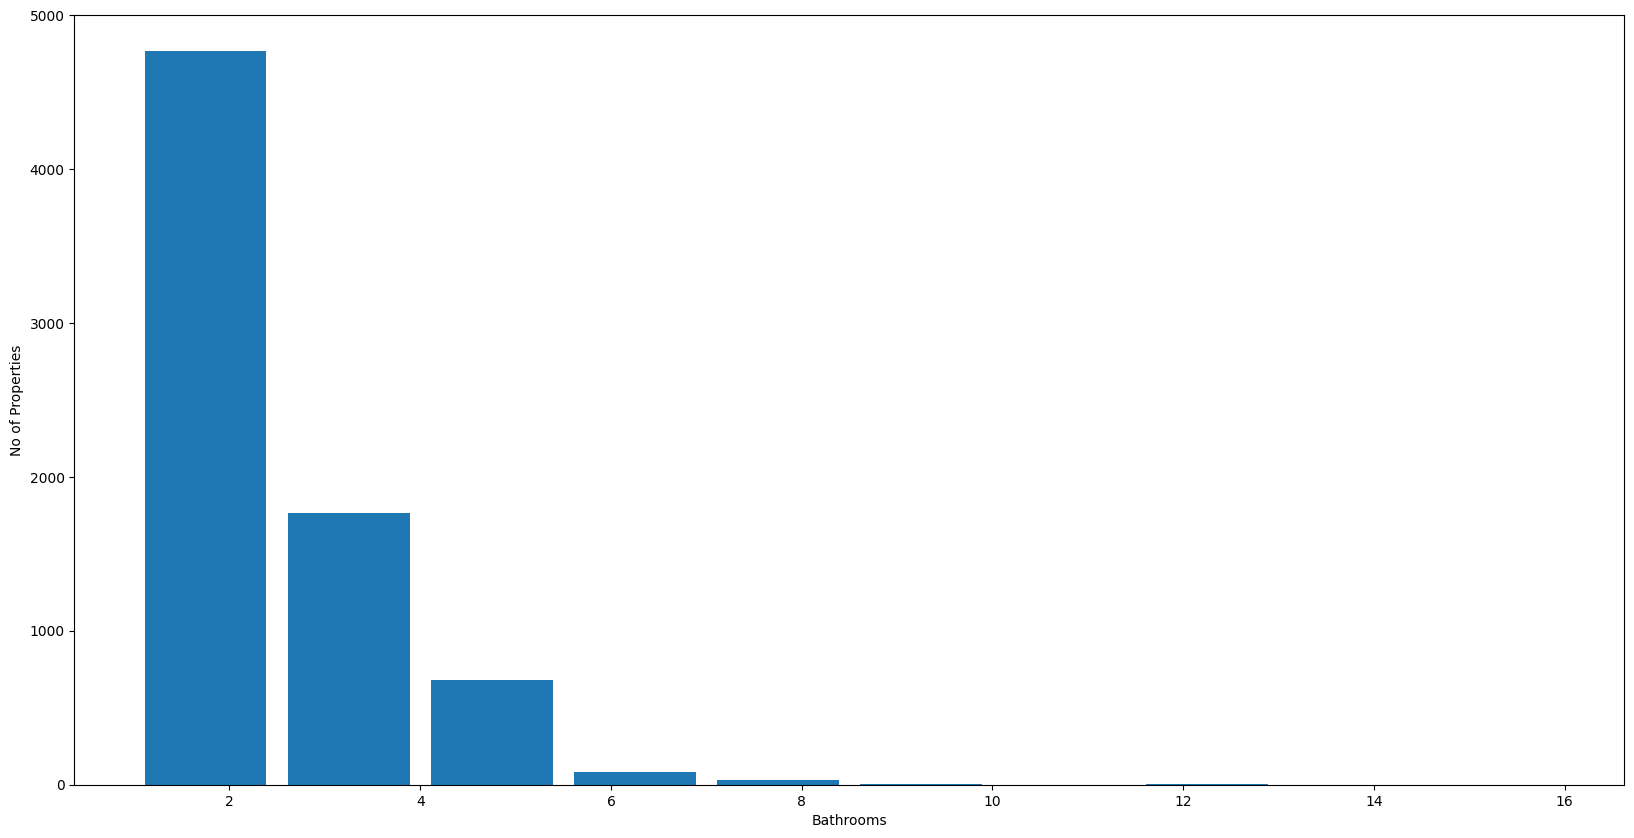

In [93]:
plt.hist(ds8.bath,rwidth =0.85)
plt.xlabel('Bathrooms')
plt.ylabel('No of Properties')

Majority of our properties have bathrooms in the range of (2,6) so we can ignore the remaining data. Also in practice ,if the apartment is 4BHK for example,it is not economic or sane😂 to have more than 6 bathrooms. So to filter out the data,we will ignore the properties who have more than 2 bathrooms greater than the bhk size of the apartment.

In [95]:
ds9 = ds8[ds8.bath<ds8.bhk+2]
ds9.shape

(7251, 7)

The size column and the price_per_sqft column have no use as for now because we have already kept the size in bhk column and price_per_sqft has been used for outlier detection.So we create a new dataset dropping these variables

In [96]:
ds10 = ds9.drop(['size','price_per_sqft'],axis = 'columns')
ds10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Now our data set is ready for the applications of Machine Learning algorithms over it. Now ,since these algorithms cant detect text data, we will have to convert the locations into numeric data so that these algorithms can be applied.

We have used 1 hot encoding method native to the pandas library here.

In [98]:
dummy_loc = pd.get_dummies(ds10.location)
dummy_loc.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
ds11 = pd.concat([ds10,dummy_loc.drop('other',axis = 'columns')],axis = 'columns')
ds11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
ds12 = ds11.drop('location',axis='columns')
ds12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now The Price is the dependent Variable.so,we remove the price column for the data to be enabled for training.

In [105]:
X = ds12.drop('price',axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [106]:
Y = ds12.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

Now we separately test the data set on the Linear Regression and K cross Validation models and evaluate the test scores in order to find the perfect model. 

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [171]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_train,Y_train)

0.8543167297214009

In [118]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5,test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(),X,Y,cv=cv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

We will now use GridSearchCV from skicit_learn model to find out the best model to generate the best evaluation scores

In [161]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

We can observe that Linear Regression Gives the best results,so it is most appropriate to use it.

In [180]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    z = np.zeros(len(X.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if(loc_index>=0):
        z[loc_index] = 1
    return lr_clf.predict([z])[0]

In [181]:
predict_price('1st Phase JP Nagar',1875,3,3)

C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


161.11953695955276

In [183]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


165.81810322446103

## The tested Predictive model is ready to be uploaded to a pickle file from where it can be used by a python flask server

In [186]:
import pickle
with open('House_price_predictor.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## Exporting location and column information to a file that will later be useful in prediction application 

In [189]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))